# 一、pandas数据结构  --Series

In [1]:
import pandas as pd

ser_obj = pd.Series(range(10, 20))
print(ser_obj)
print('-'*100)

# 获取数据
print(ser_obj.values)
print('-'*100)

# 获取索引
print(ser_obj.index)
print('-'*100)

# 通过索引获取数据
print(ser_obj[0])
print(ser_obj[1])
print('-'*100)

0    10
1    11
2    12
3    13
4    14
5    15
6    16
7    17
8    18
9    19
dtype: int64
----------------------------------------------------------------------------------------------------
[10 11 12 13 14 15 16 17 18 19]
----------------------------------------------------------------------------------------------------
RangeIndex(start=0, stop=10, step=1)
----------------------------------------------------------------------------------------------------
10
11
----------------------------------------------------------------------------------------------------


In [2]:
# 索引和数据的对应关系不被运算结果影响
print(ser_obj)
print('-'*100)
print(ser_obj * 2)
print('-'*100)
print(ser_obj > 15)
print('-'*100)

# 原 series 也不会因为运算发生改变
print(ser_obj)

0    10
1    11
2    12
3    13
4    14
5    15
6    16
7    17
8    18
9    19
dtype: int64
----------------------------------------------------------------------------------------------------
0    20
1    22
2    24
3    26
4    28
5    30
6    32
7    34
8    36
9    38
dtype: int64
----------------------------------------------------------------------------------------------------
0    False
1    False
2    False
3    False
4    False
5    False
6     True
7     True
8     True
9     True
dtype: bool
----------------------------------------------------------------------------------------------------
0    10
1    11
2    12
3    13
4    14
5    15
6    16
7    17
8    18
9    19
dtype: int64


In [3]:
# 字典变为 series
year_data = {2001: 17.8, 2005: 20.1, 2003: 16.5}
ser_obj2 = pd.Series(year_data)

print(ser_obj2)
print('-'*100)
print(ser_obj2.index)
print('-'*100)
print(ser_obj2.values)
print('-'*100)
print(ser_obj2[2001])

2001    17.8
2005    20.1
2003    16.5
dtype: float64
----------------------------------------------------------------------------------------------------
Int64Index([2001, 2005, 2003], dtype='int64')
----------------------------------------------------------------------------------------------------
[17.8 20.1 16.5]
----------------------------------------------------------------------------------------------------
17.8


In [4]:
# series 对象名字
print(ser_obj2.name)
print('-'*100)
ser_obj2.name = 'temp'  # 给对象本身搞个名字其实没啥用
print(ser_obj2.name)
print('-'*100)

# series 索引名字
print(ser_obj2.index.name)  # 给索引起个名字才有用
print('-'*100)
ser_obj2.index.name = 'year1'
print(ser_obj2.index.name)
print('-'*100)

print(ser_obj2.head())  # head(n=5)  返回对象的前n行，n默认值是5

None
----------------------------------------------------------------------------------------------------
temp
----------------------------------------------------------------------------------------------------
None
----------------------------------------------------------------------------------------------------
year1
----------------------------------------------------------------------------------------------------
year1
2001    17.8
2005    20.1
2003    16.5
Name: temp, dtype: float64


# Pandas数据结构 --DataFrame

## 列表嵌套字典创建dataframe

In [5]:
# 列表嵌套字典 创建 dataframe
d2 =[{"name" : "xiaohong" ,"age" :32,"tel" :10010},
     { "name": "xiaogang" ,"tel": 10000},
     {"name":"xiaowang" ,"age":22}]

df6=pd.DataFrame(d2)
print(df6)

       name   age      tel
0  xiaohong  32.0  10010.0
1  xiaogang   NaN  10000.0
2  xiaowang  22.0      NaN


## 字典创建dataframe 及 dataframe的属性（index 、 columns、dtypes）

In [6]:
import pandas as pd
import numpy as np

# 用字典创建dataframe
dict_data = {'A': 1,
             'B': pd.Timestamp('20190926'),
             'C': pd.Series(1, index=list(range(4)),dtype='float32'),
             'D': np.array([3] * 4,dtype='int32'),
             'E': ["Python","Java","C++","C"],
             'F': 'wangdao' }
df_obj2 = pd.DataFrame(dict_data)
print(df_obj2)
print('-'*100)

# dataframe 的行索引和列索引
print(df_obj2.index)  # 行索引
print('-'*100)
print(df_obj2.columns)  # 列索引
print('-'*100)
print(df_obj2.dtypes)  # 查看所有行的数据类型


   A          B    C  D       E        F
0  1 2019-09-26  1.0  3  Python  wangdao
1  1 2019-09-26  1.0  3    Java  wangdao
2  1 2019-09-26  1.0  3     C++  wangdao
3  1 2019-09-26  1.0  3       C  wangdao
----------------------------------------------------------------------------------------------------
Int64Index([0, 1, 2, 3], dtype='int64')
----------------------------------------------------------------------------------------------------
Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')
----------------------------------------------------------------------------------------------------
A             int64
B    datetime64[ns]
C           float32
D             int32
E            object
F            object
dtype: object


## 以随机数创建 dataframe 并指定dataframe 的行索引和列索引
    如果不指定索引的话，那索引就是自动的 0 1 2 3

In [7]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(df)

                   A         B         C         D
2013-01-01 -0.874163  2.259259  0.035721 -0.368306
2013-01-02 -2.860824  1.675822  2.214734  0.679411
2013-01-03 -1.292292 -0.285217 -0.109075 -0.444382
2013-01-04  1.291141  1.785594  0.505103 -1.123288
2013-01-05  0.128082 -0.103010  0.301246 -0.595992
2013-01-06  0.418109 -0.317132 -0.078093  1.311366


## 用列名 单独取出dataframe 的某一列是个series
## 如果希望取出来的是 dataframe 那就需要用方括号将列名括起来

In [8]:
print('用列名 单独取出dataframe 的某一列是个series:')
print(df_obj2)
print('-'*100)
print(df_obj2['A'])
print('-'*100)
print(type(df_obj2['A']))
print('-'*100)

print('如果希望取出来的是 dataframe 那就需要用方括号将列名括起来:')
print('-'*100)
print(df_obj2[['A']])
print('-'*100)
print(type(df_obj2[['A']]))

用列名 单独取出dataframe 的某一列是个series:
   A          B    C  D       E        F
0  1 2019-09-26  1.0  3  Python  wangdao
1  1 2019-09-26  1.0  3    Java  wangdao
2  1 2019-09-26  1.0  3     C++  wangdao
3  1 2019-09-26  1.0  3       C  wangdao
----------------------------------------------------------------------------------------------------
0    1
1    1
2    1
3    1
Name: A, dtype: int64
----------------------------------------------------------------------------------------------------
<class 'pandas.core.series.Series'>
----------------------------------------------------------------------------------------------------
如果希望取出来的是 dataframe 那就需要用方括号将列名括起来:
----------------------------------------------------------------------------------------------------
   A
0  1
1  1
2  1
3  1
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>


## dataframe增加列

In [9]:
# 增加列数据
print(df_obj2)
print('-'*100)

df_obj2['G'] = df_obj2['D'] + 4  # 新增列G，其数据为D列数据加上4
print(df_obj2)

   A          B    C  D       E        F
0  1 2019-09-26  1.0  3  Python  wangdao
1  1 2019-09-26  1.0  3    Java  wangdao
2  1 2019-09-26  1.0  3     C++  wangdao
3  1 2019-09-26  1.0  3       C  wangdao
----------------------------------------------------------------------------------------------------
   A          B    C  D       E        F  G
0  1 2019-09-26  1.0  3  Python  wangdao  7
1  1 2019-09-26  1.0  3    Java  wangdao  7
2  1 2019-09-26  1.0  3     C++  wangdao  7
3  1 2019-09-26  1.0  3       C  wangdao  7


## dataframe 删除列

In [10]:
# 删除列
print(df_obj2)

print('-'*100)
del(df_obj2['G'])  # 删除G列
print(df_obj2)

   A          B    C  D       E        F  G
0  1 2019-09-26  1.0  3  Python  wangdao  7
1  1 2019-09-26  1.0  3    Java  wangdao  7
2  1 2019-09-26  1.0  3     C++  wangdao  7
3  1 2019-09-26  1.0  3       C  wangdao  7
----------------------------------------------------------------------------------------------------
   A          B    C  D       E        F
0  1 2019-09-26  1.0  3  Python  wangdao
1  1 2019-09-26  1.0  3    Java  wangdao
2  1 2019-09-26  1.0  3     C++  wangdao
3  1 2019-09-26  1.0  3       C  wangdao


# 三、Pandas索引操作

In [11]:
# 索引对象不可变，想要单独对某一个索引赋值会报错，要改变索引只能通过接口整体改变所有索引
print(df_obj2.index)

# df_obj2.index[0] = 2  # 会报错

Int64Index([0, 1, 2, 3], dtype='int64')


## 常见的Index种类
    •Index，索引 
    •Int64Index，整数索引 
    •MultiIndex，层级索引 
    •DatetimeIndex，时间戳类索引

## Series 索引操作

In [12]:
ser_obj = pd.Series(range(5), index = list("abcde"))
print(ser_obj)
print('-'*100)

# series 索引
print(ser_obj.index)
print('-'*100)

# 行索引
print(ser_obj['b'])  # 直接用名称引用索引
print(ser_obj[2])  # 也可以用序列号引用索引
print('-'*100)

# 切片索引
print(ser_obj[1:3])
print(ser_obj['b':'d'])
print('-'*100)

# 不连续索引
print(ser_obj[[0, 2, 4]])
print(ser_obj[['a', 'e']])
print('-'*100)

# 布尔索引(逻辑表达式切片操作)
ser_bool = ser_obj > 2
print(ser_bool)
print(ser_obj[ser_obj <3])  # 为 True的位置才会被引用到

a    0
b    1
c    2
d    3
e    4
dtype: int64
----------------------------------------------------------------------------------------------------
Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
----------------------------------------------------------------------------------------------------
1
2
----------------------------------------------------------------------------------------------------
b    1
c    2
dtype: int64
b    1
c    2
d    3
dtype: int64
----------------------------------------------------------------------------------------------------
a    0
c    2
e    4
dtype: int64
a    0
e    4
dtype: int64
----------------------------------------------------------------------------------------------------
a    False
b    False
c    False
d     True
e     True
dtype: bool
a    0
b    1
c    2
dtype: int64


## DataFrame 索引操作

In [13]:
import numpy as np
df_obj = pd.DataFrame(np.random.randn(5,4), columns = ['a', 'b', 'c', 'd'])
print(df_obj)

          a         b         c         d
0  1.362270 -1.127933  0.297725 -1.440130
1  0.648529  1.128985 -0.432248 -1.322100
2  0.827395 -0.185386 -2.492609 -0.603756
3  0.996689 -0.282435  0.513627 -1.587104
4 -0.259093  1.024976  0.827350  0.143577


In [14]:
# 列索引
print(df_obj['a']) # 返回Series类型
print('-'*100)
print(type(df_obj['a']))
print('-'*100)

print(df_obj[['a']]) # 返回DataFrame类型
print('-'*100)
print(type(df_obj[['a']]))
print('-'*100)

0    1.362270
1    0.648529
2    0.827395
3    0.996689
4   -0.259093
Name: a, dtype: float64
----------------------------------------------------------------------------------------------------
<class 'pandas.core.series.Series'>
----------------------------------------------------------------------------------------------------
          a
0  1.362270
1  0.648529
2  0.827395
3  0.996689
4 -0.259093
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
----------------------------------------------------------------------------------------------------


## loc 标签索引
    print(df_obj.loc['a':'c', 'd':'b'])
    第一个参数索引行，第二个参数是列,loc或者iloc效率高于直接用取下标的方式，前闭后闭
    不连续就加中括号，连续就加冒号

In [15]:
# 标签索引 loc

# Series
print(ser_obj)
print('-'*100)
print(ser_obj['b':'d']) # 低效操作
print('-'*100)
print(ser_obj.loc['b':'d'])
print('-'*100)

# DataFrame
df_obj = pd.DataFrame(np.random.randn(5,4), columns = list('dcba'),index=list('abcde'))
print(df_obj)
print('-'*100)
print(df_obj['a'])  # 低效操作，不用loc()默认拿的是列
print('-'*100)
print(df_obj.loc['a'])  # loc() 只写一个参数，默认拿的是行
print('-'*100)

print(df_obj.loc['a':'c', 'd':'b'])

a    0
b    1
c    2
d    3
e    4
dtype: int64
----------------------------------------------------------------------------------------------------
b    1
c    2
d    3
dtype: int64
----------------------------------------------------------------------------------------------------
b    1
c    2
d    3
dtype: int64
----------------------------------------------------------------------------------------------------
          d         c         b         a
a -1.109487 -0.114608  0.525211  0.455834
b -0.171054  1.398720  1.155951 -0.083462
c  0.349462 -1.559647 -1.920507  1.234803
d -0.224133 -0.222094  2.195930 -0.152959
e -0.418939  0.906269  0.031482  0.172904
----------------------------------------------------------------------------------------------------
a    0.455834
b   -0.083462
c    1.234803
d   -0.152959
e    0.172904
Name: a, dtype: float64
----------------------------------------------------------------------------------------------------
d   -1.109487
c   -0.114608
b    

## iloc() 位置索引
    注意：
    loc()  前闭后闭 []
    iloc() 前闭后开 [)

In [16]:
# Series
print(ser_obj)
print('-'*100)
print(ser_obj[1:3])
print('-'*100)
print(ser_obj.iloc[1:3])
print('-'*100)

# DataFrame，iloc是前闭后开[)
print(df_obj)
print('-'*100)
print(df_obj.iloc[0:2, 0:2]) # 注意和df_obj.loc[0:2, 'a']的区别

a    0
b    1
c    2
d    3
e    4
dtype: int64
----------------------------------------------------------------------------------------------------
b    1
c    2
dtype: int64
----------------------------------------------------------------------------------------------------
b    1
c    2
dtype: int64
----------------------------------------------------------------------------------------------------
          d         c         b         a
a -1.109487 -0.114608  0.525211  0.455834
b -0.171054  1.398720  1.155951 -0.083462
c  0.349462 -1.559647 -1.920507  1.234803
d -0.224133 -0.222094  2.195930 -0.152959
e -0.418939  0.906269  0.031482  0.172904
----------------------------------------------------------------------------------------------------
          d         c
a -1.109487 -0.114608
b -0.171054  1.398720


# 四、Pandas 的对齐运算
### fill_value 参数，哪边缺数就填给哪边做运算
    如果两个series 元素个数不等
    直接相加的话，没有配对的地方会变成 NaN
    
    s1.add(s2,fill_value = 0)
    这样用add接口将两个 series 相加，不对齐的地方就会和 指定的值0 相加

In [17]:
s1 = pd.Series(range(10, 20), index = range(10))
s2 = pd.Series(range(20, 25), index = range(5))
print(s1)
print('-'*100)
print(s2)
print('-'*100)

# Series 对齐运算
print('s1+s2直接相加: ')
print(s1+s2)  # 直接相加，未对齐的位置会填 NaN
print('-'*100)

print('用add 接口并指定fill_value=0 ')
print(s1.add(s2, fill_value = 0))  # 用add()接口，未对齐的数据将和填充值做运算

0    10
1    11
2    12
3    13
4    14
5    15
6    16
7    17
8    18
9    19
dtype: int64
----------------------------------------------------------------------------------------------------
0    20
1    21
2    22
3    23
4    24
dtype: int64
----------------------------------------------------------------------------------------------------
s1+s2直接相加: 
0    30.0
1    32.0
2    34.0
3    36.0
4    38.0
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
dtype: float64
----------------------------------------------------------------------------------------------------
用add 接口并指定fill_value=0 
0    30.0
1    32.0
2    34.0
3    36.0
4    38.0
5    15.0
6    16.0
7    17.0
8    18.0
9    19.0
dtype: float64


In [18]:
# dataframe 对齐运算
df1 = pd.DataFrame(np.ones((2,2)), columns = ['a', 'b'])
df2 = pd.DataFrame(np.ones((3,3)), columns = ['a', 'b', 'c'])

print(df1-df2) # 直接相减，未对齐的位置会填 NaN
print('-'*100)
print(df1.sub(df2, fill_value = 2.)) # 用sub()接口，未对齐的数据将和填充值做运算未对齐的数据将和填充值做运算

     a    b   c
0  0.0  0.0 NaN
1  0.0  0.0 NaN
2  NaN  NaN NaN
----------------------------------------------------------------------------------------------------
     a    b    c
0  0.0  0.0  1.0
1  0.0  0.0  1.0
2  1.0  1.0  1.0


# 五、Pandas的函数应用

## Pandas可直接使用Numpy的函数(对数组dataframe整体运算)

In [19]:
# Numpy ufunc 函数
df = pd.DataFrame(np.random.randn(5,4) - 1)

print(df)
print('-'*100)
print(np.abs(df))  # 用 np.abs() 取绝对值

# 取绝对值还可以这么实现
# df[df<0]=-df
# print(df)

          0         1         2         3
0 -1.818864 -0.249482  0.698996 -0.025483
1  0.279365 -2.152154 -1.244732 -0.491042
2 -1.774946 -0.061718 -1.583545  0.534666
3 -2.494086 -1.614821 -0.323324 -1.408436
4 -1.720968 -0.697675 -0.163868 -2.772944
----------------------------------------------------------------------------------------------------
          0         1         2         3
0  1.818864  0.249482  0.698996  0.025483
1  0.279365  2.152154  1.244732  0.491042
2  1.774946  0.061718  1.583545  0.534666
3  2.494086  1.614821  0.323324  1.408436
4  1.720968  0.697675  0.163868  2.772944


## 通过 apply() 将函数应用到某一行或某一列上

In [20]:
#apply作用在列上
print(df)
print('-'*100)
print(df.apply(lambda x : x.max()))  # 取每一列的最大值 (axis 参数默认值是0)

          0         1         2         3
0 -1.818864 -0.249482  0.698996 -0.025483
1  0.279365 -2.152154 -1.244732 -0.491042
2 -1.774946 -0.061718 -1.583545  0.534666
3 -2.494086 -1.614821 -0.323324 -1.408436
4 -1.720968 -0.697675 -0.163868 -2.772944
----------------------------------------------------------------------------------------------------
0    0.279365
1   -0.061718
2    0.698996
3    0.534666
dtype: float64


In [21]:
# apply() 作用在行上
print(df)
print('-'*100)
print(df.apply(lambda x : x.max(), axis=1))  # 取每一行的最大值

          0         1         2         3
0 -1.818864 -0.249482  0.698996 -0.025483
1  0.279365 -2.152154 -1.244732 -0.491042
2 -1.774946 -0.061718 -1.583545  0.534666
3 -2.494086 -1.614821 -0.323324 -1.408436
4 -1.720968 -0.697675 -0.163868 -2.772944
----------------------------------------------------------------------------------------------------
0    0.698996
1    0.279365
2    0.534666
3   -0.323324
4   -0.163868
dtype: float64


## 通过 applymap() 将函数应用到每个数据

In [22]:
# 使用 applymap 应用到每个数据
print(df)
print('-'*100)
print(df.applymap(lambda x : '%.2f' % x))  # 四舍五入保留两位小数
print('-'*100)
print(df.dtypes)  # 打印所有行数据的数据类型
print('-'*100)
print(type(df.iloc[0,0]))  # 验证dataframe里的元素数据类型
print('-'*100)
# 其实'%.2f' % 1.23456  返回的是一个字符串，但是applymap 还是把数据设置成了float64，很机智
print('%.2f' % 1.2345)

          0         1         2         3
0 -1.818864 -0.249482  0.698996 -0.025483
1  0.279365 -2.152154 -1.244732 -0.491042
2 -1.774946 -0.061718 -1.583545  0.534666
3 -2.494086 -1.614821 -0.323324 -1.408436
4 -1.720968 -0.697675 -0.163868 -2.772944
----------------------------------------------------------------------------------------------------
       0      1      2      3
0  -1.82  -0.25   0.70  -0.03
1   0.28  -2.15  -1.24  -0.49
2  -1.77  -0.06  -1.58   0.53
3  -2.49  -1.61  -0.32  -1.41
4  -1.72  -0.70  -0.16  -2.77
----------------------------------------------------------------------------------------------------
0    float64
1    float64
2    float64
3    float64
dtype: object
----------------------------------------------------------------------------------------------------
<class 'numpy.float64'>
----------------------------------------------------------------------------------------------------
1.23


## 对索引排序  --sort_index()

In [23]:
# Series
s4 = pd.Series(range(10, 15), index = np.random.randint(5, size=5))
print(s4)
print('-'*100)

# 对索引排序
print(s4.sort_index())

3    10
3    11
4    12
4    13
3    14
dtype: int64
----------------------------------------------------------------------------------------------------
3    10
3    11
3    14
4    12
4    13
dtype: int64


In [24]:
# DataFrame（二维）
df4 = pd.DataFrame(np.random.randn(5, 5), 
                   index=np.random.randint(5, size=5),
                   columns=np.random.randint(5, size=5))
print(df4)
print('-'*100)

# 对行索引排序
df4_isort = df4.sort_index(axis=0, ascending=False)
print(df4_isort)
print('-'*100)

# 对列索引排序
df4_isort = df4.sort_index(axis=1, ascending=False)
print(df4_isort) 

          2         0         4         1         0
2 -1.140777  0.032044  1.342840  1.906201  0.397272
3  0.269712 -0.498976  0.265992  0.796901 -0.416041
2  1.173948 -0.057890  0.010832 -1.526528  0.583319
0 -0.301578 -0.420526 -1.070896  0.955582 -1.506308
1  0.325072 -0.010561  0.895849  1.348808 -0.611676
----------------------------------------------------------------------------------------------------
          2         0         4         1         0
3  0.269712 -0.498976  0.265992  0.796901 -0.416041
2 -1.140777  0.032044  1.342840  1.906201  0.397272
2  1.173948 -0.057890  0.010832 -1.526528  0.583319
1  0.325072 -0.010561  0.895849  1.348808 -0.611676
0 -0.301578 -0.420526 -1.070896  0.955582 -1.506308
----------------------------------------------------------------------------------------------------
          4         2         1         0         0
2  1.342840 -1.140777  1.906201  0.032044  0.397272
3  0.265992  0.269712  0.796901 -0.498976 -0.416041
2  0.010832  1.173

## 对值排序  --sort_values()

In [4]:
# 按值排序,by参数是 当前轴上的索引位置，表示对这个列（行）排序
import numpy as np
import pandas as pd
import random

list0=[random.randint(0,100) for i in range(24)]
df4 = pd.DataFrame(np.array(list0).reshape(6,4))
print(df4.values)
print('-'*100)
print(df4)
print('-'*100)

df4_vsort = df4.sort_values(by=3,axis=0, ascending=False) # 排的是 columns 里的3
print(df4_vsort)
print('-'*100)

df4_vsort = df4.sort_values(by=3,axis=1, ascending=False) # 排的是 index 里的3
print(df4_vsort)

[[98 55 25 35]
 [ 5  5 42 11]
 [89 39 86 82]
 [38 54 96  0]
 [92  8 96 96]
 [30 76 67 55]]
----------------------------------------------------------------------------------------------------
    0   1   2   3
0  98  55  25  35
1   5   5  42  11
2  89  39  86  82
3  38  54  96   0
4  92   8  96  96
5  30  76  67  55
----------------------------------------------------------------------------------------------------
    0   1   2   3
4  92   8  96  96
2  89  39  86  82
5  30  76  67  55
0  98  55  25  35
1   5   5  42  11
3  38  54  96   0
----------------------------------------------------------------------------------------------------
    2   1   0   3
0  25  55  98  35
1  42   5   5  11
2  86  39  89  82
3  96  54  38   0
4  96   8  92  96
5  67  76  30  55


## 处理缺失数据(NaN)

In [33]:
df_data = pd.DataFrame([np.random.randn(3),
                       [1., 2., np.nan],
                       [np.nan, 4., np.nan],
                       [1., 2., 3.]])
print(df_data)
print('-'*100)

print(df_data.isnull())  # isnull() 会将nan的位置变成True

        0         1        2
0 -1.1064  1.057572  2.24159
1  1.0000  2.000000      NaN
2     NaN  4.000000      NaN
3  1.0000  2.000000  3.00000
----------------------------------------------------------------------------------------------------
       0      1      2
0  False  False  False
1  False  False   True
2   True  False   True
3  False  False  False


In [9]:
print(df_data.dropna())  # 某一行有nan就删除这一行（axis默认是0）

          0         1         2
0 -0.616612  0.832379 -1.392858
3  1.000000  2.000000  3.000000


In [12]:
print(df_data.dropna(axis=1))  # 某一列有nan就删除这一列（必须指定axis=1）

          1
0  0.832379
1  2.000000
2  4.000000
3  2.000000


In [13]:
print(df_data.fillna(-100.))  # 将 nan 填成 -100.(浮点数)
print('-'*100)

            0         1           2
0   -0.616612  0.832379   -1.392858
1    1.000000  2.000000 -100.000000
2 -100.000000  4.000000 -100.000000
3    1.000000  2.000000    3.000000


In [37]:
# 练习  --将nan替换成这一列的平均值

print(df_data)
print('-'*100)

for i in df_data.columns:
    mean_value = np.mean(df_data.iloc[:,i])  # 取这一列的平均值
    temp_ser = df_data.iloc[:,i]  # 取出这一列(取出的是个series)
    temp_ser[np.isnan(temp_ser)] = mean_value  # 将这一列的 nan 换成平均值
    print(temp_ser)
    print('-'*100)

print(df_data)  # 所有 nan 都替换完成

          0         1         2
0 -1.106400  1.057572  2.241590
1  1.000000  2.000000  2.620795
2  0.297867  4.000000  2.620795
3  1.000000  2.000000  3.000000
----------------------------------------------------------------------------------------------------
0   -1.106400
1    1.000000
2    0.297867
3    1.000000
Name: 0, dtype: float64
----------------------------------------------------------------------------------------------------
0    1.057572
1    2.000000
2    4.000000
3    2.000000
Name: 1, dtype: float64
----------------------------------------------------------------------------------------------------
0    2.241590
1    2.620795
2    2.620795
3    3.000000
Name: 2, dtype: float64
----------------------------------------------------------------------------------------------------
          0         1         2
0 -1.106400  1.057572  2.241590
1  1.000000  2.000000  2.620795
2  0.297867  4.000000  2.620795
3  1.000000  2.000000  3.000000


# 六、层级索引

## 层级索引创建 series

In [45]:
import pandas as pd
import numpy as np

# 创建 MultiIndex 索引对象
index1 = pd.MultiIndex.from_arrays(
    [['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'c', 'd', 'd', 'd'],
     [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]],
    names=['cloth', 'size'])

# 用索引对象创建带层级索引的 series
ser_obj = pd.Series(np.random.randn(12),index=index1)
print(ser_obj)
print('-'*100)

print(type(ser_obj))  # series 对象的数据类型是 Series
print('-'*100)
print(type(ser_obj.index))  # series 的索引的数据类型是 MultiIndex
print('-'*100)
print(ser_obj.index)
print('-'*100)
print(ser_obj.index.levels)
print('-'*100)
print(ser_obj.index.codes)

cloth  size
a      0       0.027751
       1       0.023917
       2       1.670058
b      0      -0.177592
       1       0.076316
       2       0.135833
c      0      -0.324119
       1       0.306158
       2       0.998703
d      0       0.223416
       1      -1.367811
       2      -1.274167
dtype: float64
----------------------------------------------------------------------------------------------------
<class 'pandas.core.series.Series'>
----------------------------------------------------------------------------------------------------
<class 'pandas.core.indexes.multi.MultiIndex'>
----------------------------------------------------------------------------------------------------
MultiIndex([('a', 0),
            ('a', 1),
            ('a', 2),
            ('b', 0),
            ('b', 1),
            ('b', 2),
            ('c', 0),
            ('c', 1),
            ('c', 2),
            ('d', 0),
            ('d', 1),
            ('d', 2)],
           names=['cloth', 'size']

## 用层级索引取数据

In [41]:
#层级索引如何取数据
print(ser_obj) 
print('-'*50)

print(ser_obj['c'])  # 取'c'下的所有内层索引数据
print('-'*50)

print(ser_obj['a', 2])  # 取 'a' 下的 2 位置的数据
print('-'*50)

print(ser_obj[:, 2])  # 取所有外层索引下的2位置处的数据

cloth  size
a      0       0.800647
       1       1.988033
       2      -1.107596
b      0       1.092944
       1      -1.029216
       2      -1.286470
c      0       0.345542
       1      -0.181128
       2       1.342416
d      0      -0.481273
       1       0.721295
       2       0.445194
dtype: float64
--------------------------------------------------
size
0    0.345542
1   -0.181128
2    1.342416
dtype: float64
--------------------------------------------------
-1.1075964222302093
--------------------------------------------------
cloth
a   -1.107596
b   -1.286470
c    1.342416
d    0.445194
dtype: float64


## 层级索引的 堆叠(stack)/反堆叠(unstack)
    series unstack变成了 dataframe ,
    那dataframe 再unstack 变成什么样的dataframe?
    其实dataframe再unstack的话是会变成列索引也是层级索引的dataframe(相当于是列索引堆叠了)
    
    这样一来就能理解堆叠和反堆叠到底是干啥的了
    堆叠就是把列索引堆到行索引上，让行索引变成更高级的层级索引
    反堆叠就是把行索引堆到列索引上，让列索引变成更高级的层级索引
    就是行索引和列索引相互展开到对方身上的一种操作

In [52]:
print(ser_obj)
print('-'*50)

# 反堆叠：series -> dataframe
df_obj=ser_obj.unstack(0)  # unstack 可以放索引名(或索引位置),将指定位置的层级索引反堆叠到columns上，
                            # 参数0表示最外层索引，默认其实是将最内层索引(0 1 2 )展开成列索引
print(df_obj)
print('-'*50)

# 堆叠：dataframe -> series
ser_obj=df_obj.stack()  # stack 将指定位置的 columns 堆叠到行索引的最内层索引
print(ser_obj)
print('-'*50)


cloth  size
a      0       0.027751
       1       0.023917
       2       1.670058
b      0      -0.177592
       1       0.076316
       2       0.135833
c      0      -0.324119
       1       0.306158
       2       0.998703
d      0       0.223416
       1      -1.367811
       2      -1.274167
dtype: float64
--------------------------------------------------
cloth         a         b         c         d
size                                         
0      0.027751 -0.177592 -0.324119  0.223416
1      0.023917  0.076316  0.306158 -1.367811
2      1.670058  0.135833  0.998703 -1.274167
--------------------------------------------------
size  cloth
0     a        0.027751
      b       -0.177592
      c       -0.324119
      d        0.223416
1     a        0.023917
      b        0.076316
      c        0.306158
      d       -1.367811
2     a        1.670058
      b        0.135833
      c        0.998703
      d       -1.274167
dtype: float64
--------------------------------------

## ser_obj.sort_index()  --按层级索引排序

In [53]:
print(ser_obj)
print('-'*50)
print(ser_obj.sort_index(level=0))  # 层级索引按哪个索引级别排序
print('-'*50)

size  cloth
0     a        0.027751
      b       -0.177592
      c       -0.324119
      d        0.223416
1     a        0.023917
      b        0.076316
      c        0.306158
      d       -1.367811
2     a        1.670058
      b        0.135833
      c        0.998703
      d       -1.274167
dtype: float64
--------------------------------------------------
size  cloth
0     a        0.027751
      b       -0.177592
      c       -0.324119
      d        0.223416
1     a        0.023917
      b        0.076316
      c        0.306158
      d       -1.367811
2     a        1.670058
      b        0.135833
      c        0.998703
      d       -1.274167
dtype: float64
--------------------------------------------------


## swaplevel  --层级索引交换索引级别

In [55]:
print(ser_obj)
print('-'*50)
print(ser_obj.swaplevel())  # 交换 size 和 cloth 的level(层级索引等级)
# ser_obj=ser_obj.swaplevel() 
print('-'*50)

size  cloth
0     a        0.027751
      b       -0.177592
      c       -0.324119
      d        0.223416
1     a        0.023917
      b        0.076316
      c        0.306158
      d       -1.367811
2     a        1.670058
      b        0.135833
      c        0.998703
      d       -1.274167
dtype: float64
--------------------------------------------------
cloth  size
a      0       0.027751
b      0      -0.177592
c      0      -0.324119
d      0       0.223416
a      1       0.023917
b      1       0.076316
c      1       0.306158
d      1      -1.367811
a      2       1.670058
b      2       0.135833
c      2       0.998703
d      2      -1.274167
dtype: float64
--------------------------------------------------


# 七、Pandas 统计计算和描述

## 常用的统计函数
    sum(axis=0,skipna=True)      求和
    mean(axis=0,skipna=True)     求平均值
    max(axis=0,skipna=True)      求最大值
    min(axis=0,skipna=True)      求最小值
    describe()   查看每一列的多个统计信息
    
    参数说明：
    axis=0 按列计算，axis=1 按行计算
    skipna 排除nan(默认为True)
    

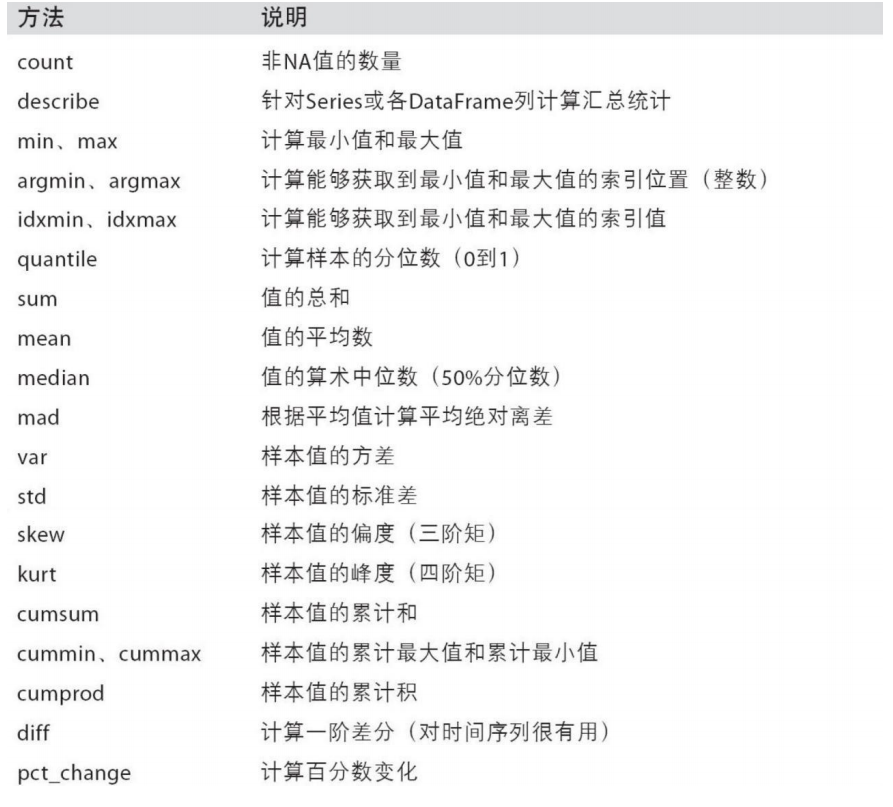

In [58]:
print(df_obj)
print('-'*50)
df_obj.loc[0,'b']=np.nan
print(df_obj)
print('-'*50)

print(df_obj.min(axis=1, skipna=True))  # 计算每一行的最小值（跳过nan）
print('-'*50)

cloth         a         b         c         d
size                                         
0      0.027751       NaN -0.324119  0.223416
1      0.023917  0.076316  0.306158 -1.367811
2      1.670058  0.135833  0.998703 -1.274167
--------------------------------------------------
cloth         a         b         c         d
size                                         
0      0.027751       NaN -0.324119  0.223416
1      0.023917  0.076316  0.306158 -1.367811
2      1.670058  0.135833  0.998703 -1.274167
--------------------------------------------------
size
0   -0.324119
1   -1.367811
2   -1.274167
dtype: float64
--------------------------------------------------


## describe()  --对series或dataframe的每一列计算各个统计量的值

In [60]:
print(df_obj)
print('-'*50)
print(df_obj.describe())  # 查看每一列的多个统计量的值

cloth         a         b         c         d
size                                         
0      0.027751       NaN -0.324119  0.223416
1      0.023917  0.076316  0.306158 -1.367811
2      1.670058  0.135833  0.998703 -1.274167
--------------------------------------------------
cloth         a         b         c         d
count  3.000000  2.000000  3.000000  3.000000
mean   0.573909  0.106075  0.326914 -0.806187
std    0.949295  0.042085  0.661655  0.892891
min    0.023917  0.076316 -0.324119 -1.367811
25%    0.025834  0.091195 -0.008981 -1.320989
50%    0.027751  0.106075  0.306158 -1.274167
75%    0.848905  0.120954  0.652430 -0.525376
max    1.670058  0.135833  0.998703  0.223416


## ser_obj.argmin或aser_obj.argmax  --计算最小值或者最大值的索引的位置
    rgmin和argmax只能是series，不能是df，所以要先切片

In [76]:
df_obj = pd.DataFrame(np.random.randn(5,4), columns = ['a', 'b', 'c', 'd'])
print(df_obj)
print('-'*50)

#计算最小值或者最大值的索引的位置
print(type(df_obj.loc[:,'c']))
print('-'*50)
print(df_obj.loc[:,'c'].argmin()) # c列最小值的索引位置是1
print('-'*50)
print(df_obj.loc[:,'a'].argmax()) # a列最大值的索引位置是3


          a         b         c         d
0 -0.543428  1.067361  0.865429  1.251951
1  0.205423 -0.123363 -1.715828  2.055875
2 -0.813986 -0.299919 -0.978865 -0.812859
3  0.755043 -0.784687  0.702356  0.701464
4  0.044184  0.382208  0.888982 -0.925055
--------------------------------------------------
<class 'pandas.core.series.Series'>
--------------------------------------------------
1
--------------------------------------------------
3


## df_obj.idmin()  --计算最大值或最小值的索引值

In [79]:
df_obj = pd.DataFrame(np.random.randn(5,4), columns = ['a', 'b', 'c', 'd'])
print(df_obj)
print('-'*50)

print(df_obj.idxmin(axis=1))  # 计算每一行的最小值的索引值
print('-'*50)
print(df_obj.idxmax(axis=0))  # 计算每一列的最大值的索引值

          a         b         c         d
0 -1.073817  2.269371  2.979252  0.478547
1  0.471607 -0.834813 -0.051593  1.036028
2  0.200376 -0.922663 -2.523341 -0.869920
3  0.660729  0.148436  1.587769 -0.186579
4  1.581706 -0.126251  1.177457 -0.077520
--------------------------------------------------
0    a
1    b
2    c
3    d
4    b
dtype: object
--------------------------------------------------
a    4
b    0
c    0
d    1
dtype: int64


# 实战--电影数据分析

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB
None
----------------------------------------------------------------------------------------------------
              Rank         Year  Runtim

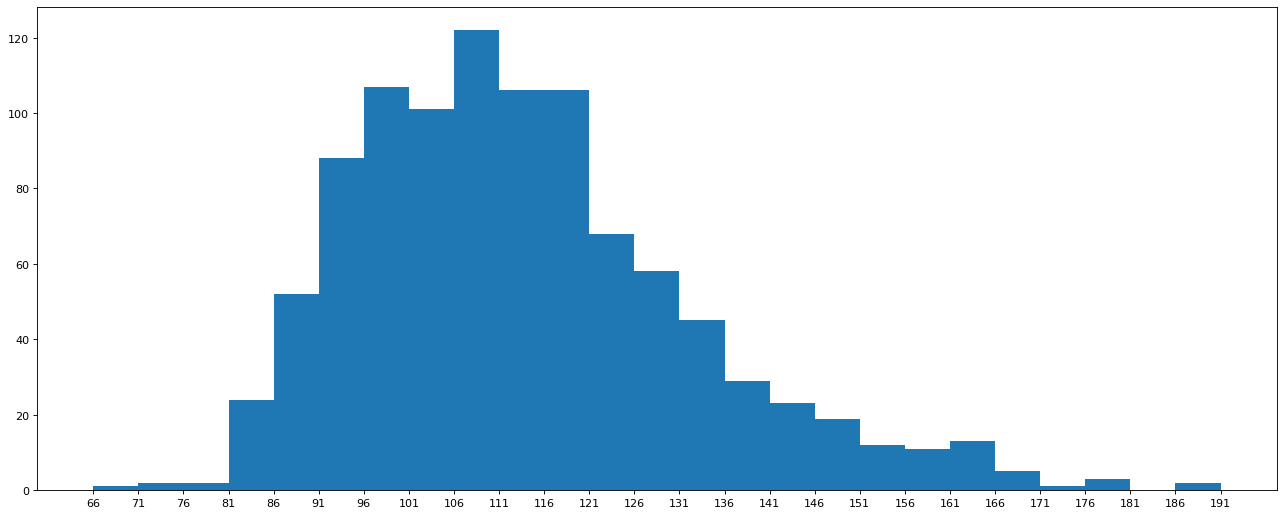

In [91]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

file_path = "IMDB-Movie-Data.csv"
df = pd.read_csv(file_path)   # 将电影数据读取到dataframe变量中
# 打印数据信息
print(df.info())
print('-'*100)
print(df.describe())
print('-'*100)
print(df.head(5))
print('-'*100)

# 获取1000部电影的评分平均值
print('1000部电影的评分平均值:')
print(df.loc[:,"Rating"].mean())  # 取rating 这一列求平均值
print('-'*100)

# 获取导演的人数
print('导演的人数:')
print(len(set(df.loc[:,"Director"].tolist()))) # 取director这一列放列表里，再转成集合去重在打印长度
print(len(df.loc[:,"Director"].unique()))  # 取出director 这一列直接用series的unique方法去重
print('-'*100)

# 获取演员的人数
temp_actors_list = df.loc[:,"Actors"].str.split(", ").tolist()  # 二维列表
print('所有电影的演员列表二位数组(只显示前两行)：\n',temp_actors_list[0],'\n',temp_actors_list[1])
print('-'*100)
actors_list = [i for j in temp_actors_list for i in j]  # 二维展为一维
actors_num = len(set(actors_list))  # 转成集合去重后求长度
print('演员的人数:')
print(actors_num)
print('-'*100)

# rating,runtime（评分和）分布情况
# 选择图形：直方图
# 准备数据
runtime_data = df["Runtime (Minutes)"].values

max_runtime = runtime_data.max()
min_runtime = runtime_data.min()

# 计算组数
print(max_runtime - min_runtime)  # 先打印极差看下组距为多少合适
print('-'*50)
num_bin = (max_runtime - min_runtime) // 5

# 设置画布的大小
plt.figure(figsize=(20, 8), dpi=80)
# 第二个bins参数必须为int或sequence或str，bins代表划分为多少个单元
plt.hist(runtime_data, int(num_bin))

# 设置x轴刻度（最小值，最大值，步长）
plt.xticks(range(min_runtime, max_runtime + 5, 5))

plt.show()